<a href="https://colab.research.google.com/github/SebastianSaldarriagaC1/so-tiny-ml/blob/main/TinyML01_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset

We initially considered generating our own dataset, either randomly or by capturing data with an Arduino. While this approach could have offered some advantages in terms of customizability and control over data collection parameters, we ultimately decided to utilize a dataset sourced from Kaggle for several reasons, especially in the context of building a TinyML model for temperature anomaly detection.

1. **Data Quality and Quantity:** Kaggle datasets are often curated, well-documented, and come with a substantial amount of data. The dataset we chose, "Climate Change: Earth Surface Temperature Data," likely contains historical temperature records from various locations worldwide. This rich dataset provides a diverse range of real-world scenarios and anomalies, which is crucial for training a robust TinyML model.

2. **Time and Resource Efficiency:** Generating our own dataset would have required significant time and resources. It would involve setting up sensors, ensuring data accuracy, and collecting data over a sufficient period to capture diverse environmental conditions. By leveraging an existing dataset from Kaggle, we can bypass these time-consuming steps and focus directly on model development and optimization.

3. **Model Generalization:** Utilizing a Kaggle dataset enables us to train our TinyML model on a broader range of temperature data than we could feasibly generate ourselves. This enhances the model's ability to generalize to unseen data and detect anomalies effectively across different geographic locations and climatic conditions.

In summary, while generating our own dataset could offer certain advantages, such as tailored data collection and control, the decision to use a Kaggle dataset for building a TinyML model for temperature anomaly detection was driven by considerations of data quality, quantity, time efficiency, model generalization, and community validation. This approach allows us to leverage existing resources effectively and focus on developing a robust and scalable solution for temperature anomaly detection.

Dataset we are going to work with: [Climate Change: Earth Surface Temperature Data (Kaggle)](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data?select=GlobalLandTemperaturesByCity.csv)

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sebassaldarriaga","key":"d06e1f8f78136a3bf931cea7ca9a151e"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 May 27 03:41 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
License(s): CC-BY-NC-SA-4.0
 86% 73.0M/84.7M [00:00<00:00, 93.2MB/s]
100% 84.7M/84.7M [00:01<00:00, 87.5MB/s]


In [ ]:
!unzip climate-change-earth-surface-temperature-data.zip

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv", encoding='utf-8')

# Data Understanding

Understanding the data is essential for building an effective model. In this phase, we'll explore and analyze the collected data to identify patterns and potential issues. This includes loading the data, exploring its structure, and understanding key features related to temperature anomalies. By gaining insights into the data distribution and outliers, we can prepare the data for modeling, laying the foundation for a successful TinyML model.

In [ ]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

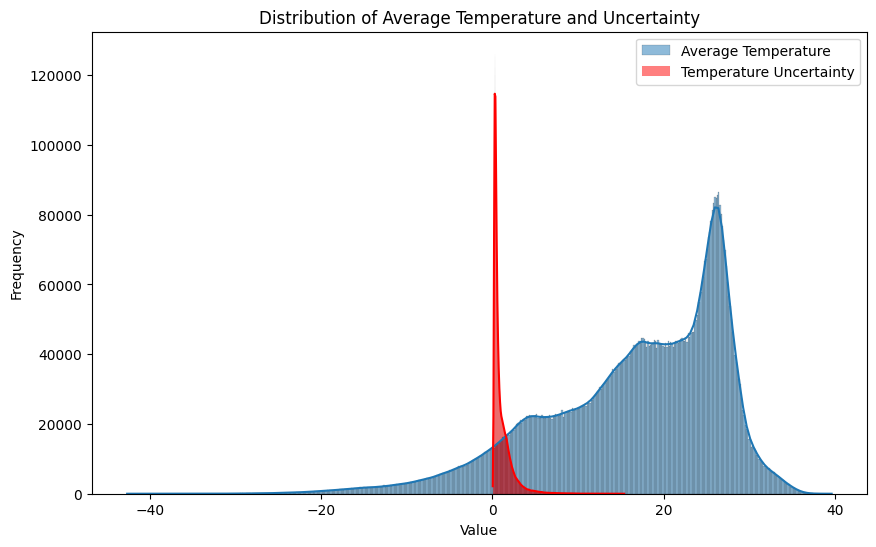

In [ ]:
# Visualize the distribution of AverageTemperature and AverageTemperatureUncertainty
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperature'], kde=True, label='Average Temperature')
sns.histplot(df['AverageTemperatureUncertainty'], kde=True, color='red', label='Temperature Uncertainty')
plt.title('Distribution of Average Temperature and Uncertainty')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Handling unconsistent values

In this phase, we address inconsistencies in the data to ensure its quality for modeling. First, we handle NaN values, ensuring completeness. Then, we remove redundant columns that convey duplicate information. Finally, we convert data types where necessary for seamless processing. By addressing these inconsistencies, we enhance the reliability of our data, laying a robust foundation for building an accurate TinyML model for temperature anomaly detection.

In [ ]:
df.dropna(inplace=True)

Now, we are going to convert dt into date format to extract its Year and Month (Which is enough to consider season variation in our model. It is also more efficient)

In [ ]:
# Convert dt column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

In [ ]:
 # Extract month and year from the 'dt' column
df['Month'] = df['dt'].dt.month
df['Year'] = df['dt'].dt.year

In [ ]:
cleaned_df = df.drop(columns= 'dt')

In [ ]:
cleaned_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
0,6.068,1.737,Århus,Denmark,57.05N,10.33E,11,1743
5,5.788,3.624,Århus,Denmark,57.05N,10.33E,4,1744
6,10.644,1.283,Århus,Denmark,57.05N,10.33E,5,1744
7,14.051,1.347,Århus,Denmark,57.05N,10.33E,6,1744
8,16.082,1.396,Århus,Denmark,57.05N,10.33E,7,1744


Now, country and city give the same information to our model which is the location. So we are going to convert latitude and longitud to its decimal value and drop city and country columns

In [ ]:
# Function to convert latitude/longitude with direction to decimal degrees
def convert_to_decimal(degrees_with_direction):
    direction = 1 if degrees_with_direction[-1] in ['N', 'E'] else -1
    degrees = float(degrees_with_direction[:-1])
    return degrees * direction

In [ ]:
cleaned_df['Latitude'] = cleaned_df['Latitude'].apply(convert_to_decimal)
cleaned_df['Longitude'] = cleaned_df['Longitude'].apply(convert_to_decimal)

In [ ]:
cleaned_df = cleaned_df.drop(columns = ['City', 'Country'])

In [ ]:
cleaned_df.head()

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,Month,Year
0,6.068,1.737,57.05,10.33,11,1743
5,5.788,3.624,57.05,10.33,4,1744
6,10.644,1.283,57.05,10.33,5,1744
7,14.051,1.347,57.05,10.33,6,1744
8,16.082,1.396,57.05,10.33,7,1744


In [ ]:
cleaned_df.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
Latitude                         float64
Longitude                        float64
Month                              int32
Year                               int32
dtype: object

In [ ]:
dirty_df = cleaned_df[cleaned_df['AverageTemperatureUncertainty'] > 1]

In [ ]:
# Save dirty data
from google.colab import drive
drive.mount('/content/drive')

dirty_df.to_csv("/content/drive/My Drive/dirty-earth-surface-temperature-data.csv", index=False)

Mounted at /content/drive


In [ ]:
cleaned_df = cleaned_df[cleaned_df['AverageTemperatureUncertainty'] < 2]


In [ ]:
cleaned_df = cleaned_df.drop(columns = ['AverageTemperatureUncertainty'])
cleaned_df.reset_index(drop = True)

,AverageTemperature,Latitude,Longitude,Month,Year
0,6.068,57.05,10.33,11,1743
1,10.644,57.05,10.33,5,1744
2,14.051,57.05,10.33,6,1744
3,16.082,57.05,10.33,7,1744
4,12.781,57.05,10.33,9,1744
...,...,...,...,...,...
7149067,7.710,52.24,5.26,4,2013
7149068,11.464,52.24,5.26,5,2013
7149069,15.043,52.24,5.26,6,2013
7149070,18.775,52.24,5.26,7,2013


# Saving processed dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

cleaned_df.to_csv("/content/drive/My Drive/processed-earth-surface-temperature-data.csv", index=False)

Mounted at /content/drive
